In [2]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('results/agar100k/PPO/results.db')
cursor = conn.cursor()

# Execute a query to retrieve the needed information
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")

# Fetch all rows from the executed query
rows = cursor.fetchall()

# Print the retrieved rows
for row in rows:
    print(row)

# Close the connection
conn.close()

('metadata',)
('hyperparameters',)
('results',)


In [4]:
# Reconnect to the SQLite database
conn = sqlite3.connect('results/agar100k/PPO/results.db')
cursor = conn.cursor()

# Execute a query to retrieve the column names from the 'results' table
cursor.execute("PRAGMA table_info(results)")

# Fetch all rows from the executed query
columns_info = cursor.fetchall()

# Extract and print the column names
columns = [info[1] for info in columns_info]
print(columns)

# Close the connection
conn.close()


['entropy_loss', 'moving_avg', 'SPS', 'explained_variance', 'config_id', 'clipfrac', 'policy_loss', 'frame', 'old_approx_kl', 'reward', 'approx_kl', 'seed', 'value_loss', 'lr', 'eval_moving_avg', 'eval_reward']


<Axes: >

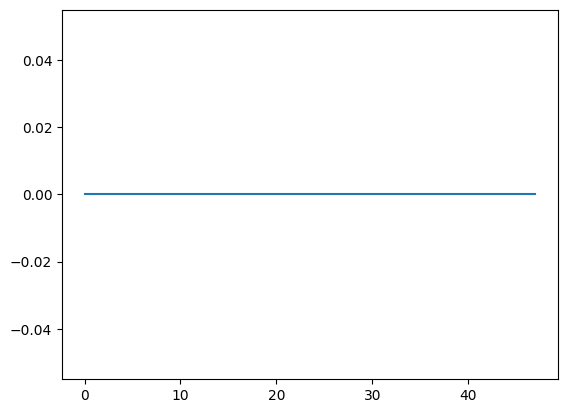

In [9]:
# Create a DataFrame from the results list using the columns list
import pandas as pd
# Reconnect to the SQLite database
conn = sqlite3.connect('results/agar100k/PPO/results.db')
cursor = conn.cursor()

# Execute a query to retrieve all rows from the 'results' table
cursor.execute("SELECT * FROM results")

# Fetch all rows from the executed query
results = cursor.fetchall()

# Close the connection
conn.close()
df_results = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df_results['reward'].plot()

<Axes: >

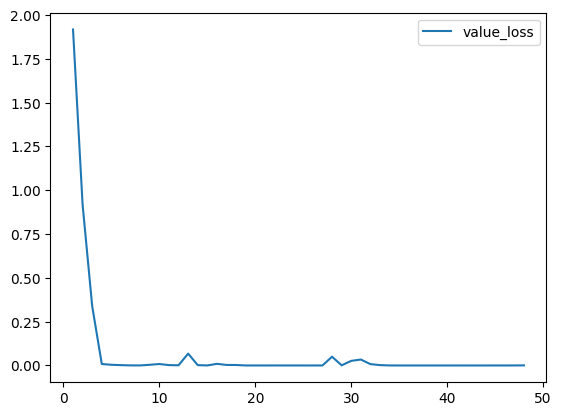

In [10]:
import pandas as pd

# Extract the value_loss column from the results list
value_loss_data = [result[12] for result in results]

# Create a DataFrame with the extracted data
df_value_loss = pd.DataFrame(value_loss_data, columns=['value_loss'])

df_value_loss.plot()

<Axes: >

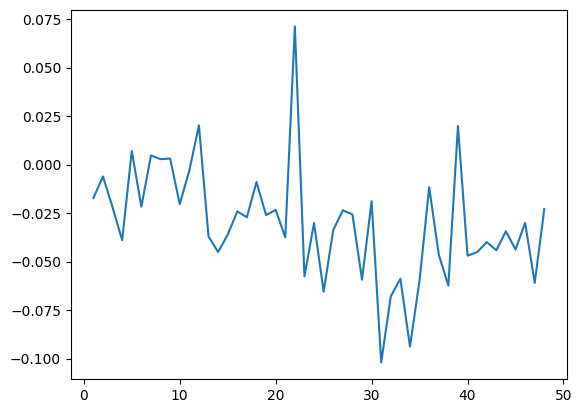

In [11]:
df_results['policy_loss'].plot()

<Axes: >

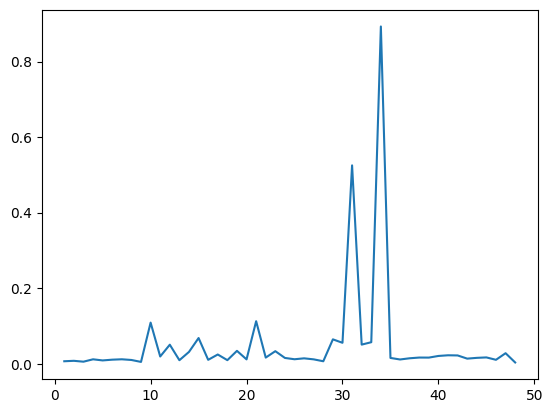

In [15]:
df_results['approx_kl'].plot()